1. wczyta zdj˛ecie z pliku,

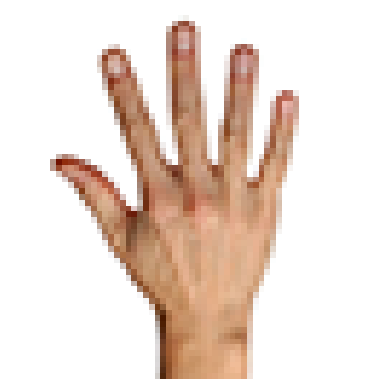

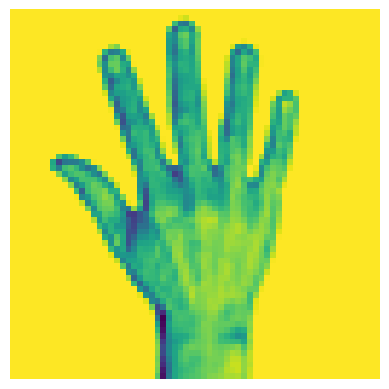

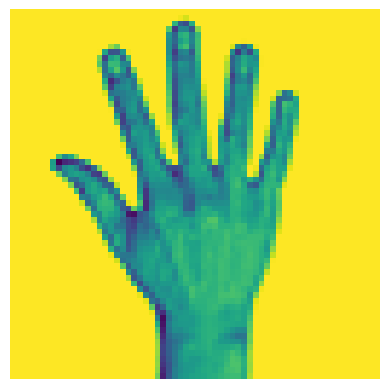

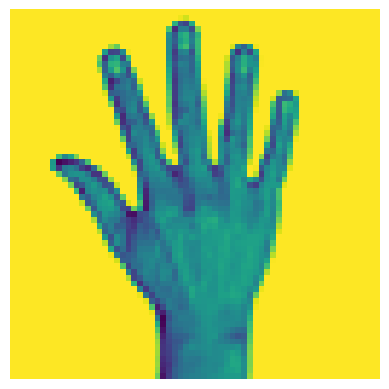

In [36]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2
hand_image = cv2.imread('hand_photo.ppm')
hand_image = cv2.cvtColor(hand_image, cv2.COLOR_BGR2RGB)
R, G, B = cv2.split(hand_image)
# Display the image
plt.imshow(hand_image)
plt.axis('off')  # Turn off axis
plt.show()
plt.imshow(R)
plt.axis('off')  # Turn off axis
plt.show()
plt.imshow(G)
plt.axis('off')  # Turn off axis
plt.show()
plt.imshow(B)
plt.axis('off')  # Turn off axis
plt.show()

2. dokona konwersji zdj˛ecia z formatu RGB na format YCbCr zgodnie z metod ˛a opisan ˛a
w rozdziale 9.2. Uwaga. Prosz˛e nie wykorzystywac do tego celu funkcji wbudowanej ´
w srodowisko – prosz˛e wykorzysta ´ c podane równania ´ bezposrednio ´ .


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


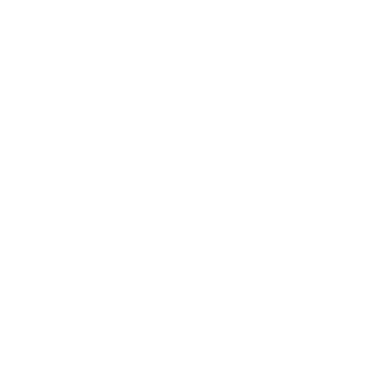

In [37]:
import numpy as np
conversion_matrix = np.array([[0.299, 0.587, 0.114],
                              [-0.168736, -0.331264, 0.5],
                              [0.5, -0.418688, -0.081312]])
rgb = np.stack((R.astype(np.float32), G.astype(
    np.float32), B.astype(np.float32)))
ycbcr = np.dot(conversion_matrix, rgb.reshape((3, -1))) + \
    np.array([[0], [128], [128]])
YCbCr = ycbcr.reshape(hand_image.shape)
Y, Cb, Cr = cv2.split(YCbCr)
plt.imshow(YCbCr)
plt.axis('off')  # Turn off axis
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


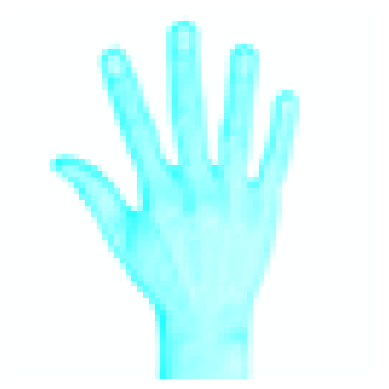

In [38]:
def ycc_f(r, g, b):  # in (0,255) range
    y = .299*r + .587*g + .114*b
    cb = 128 - .168736*r - .331364*g + .5*b
    cr = 128 + .5*r - .418688*g - .081312*b
    img_ycrcb = np.stack((y, cb, cr), axis=2)
    return img_ycrcb


R = R / 255.0
G = G / 255.0
B = B / 255.0
YCbCr = ycc_f(R, G, B)
plt.imshow(YCbCr)
plt.axis('off')  # Turn off axis
plt.show()

3. dokona segmentacji obszaru twarzy (koloru skóry) – 9.2.


In [41]:
# Segmentacja obszaru twarzy
mask = np.zeros_like(YCbCr[:, :, 0])
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if YCbCr[i, j, 1] > 77 and YCbCr[i, j, 2] > 133:
            mask[i, j] = 1

4. dokona filtracji maski – kontekstowa filtracja medianowa dla obrazów binarnych
(funkcja medfilt2 lub medianBlur)

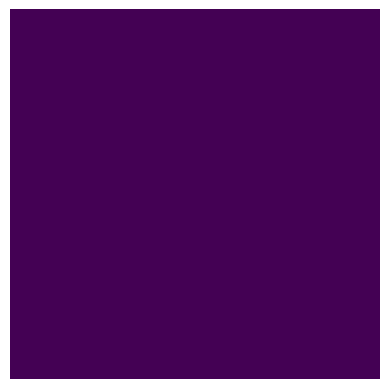

In [42]:
# Filtracja maski
filtered_mask = cv2.medianBlur(mask.astype(np.uint8), ksize=3)
plt.imshow(filtered_mask)
plt.axis('off')  # Turn off axis
plt.show()